In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# read data 
df = pd.read_csv('/Users/anastasiakucina/project/ML_course/data/marketing_campaign.csv', sep = ';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# Easy 

#1. Amount of Complains
print("Общее количество жалоб", df['Complain'].sum())

Общее количество жалоб 21


In [5]:
#2. Mean age of customers
def age(row):
    return datetime.now().year - row


In [6]:
df['Age'] = df['Year_Birth'].apply(age)
df['Mnt'] = df[['MntFishProducts','MntMeatProducts','MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].sum(axis=1)

print('Общий средний возраст', df['Age'].mean())
print('Средний возраст покупателей', df.query('Mnt > 0')['Age'].mean()) # сделали срез на тех, кто что-то купил за последние два года 

Общий средний возраст 55.19419642857143
Средний возраст покупателей 55.19419642857143


In [7]:
df['Mnt'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Mnt, dtype: float64

In [8]:
# С помощью метода дескрайб, понимаем, что и правда все люди из датасета 
#что-то покупали за последние 2 года, поэтому являются клиентами -- поэтому средний возраст совпадает

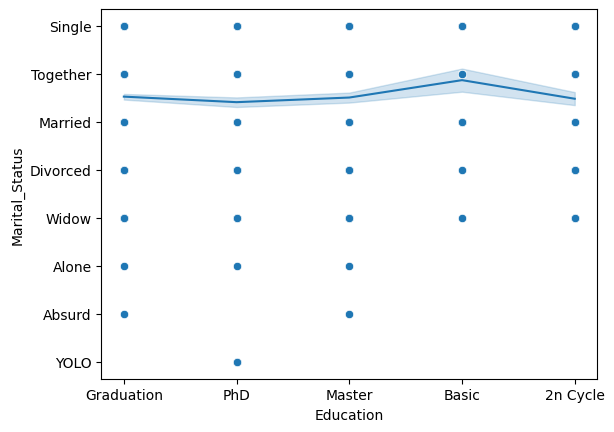

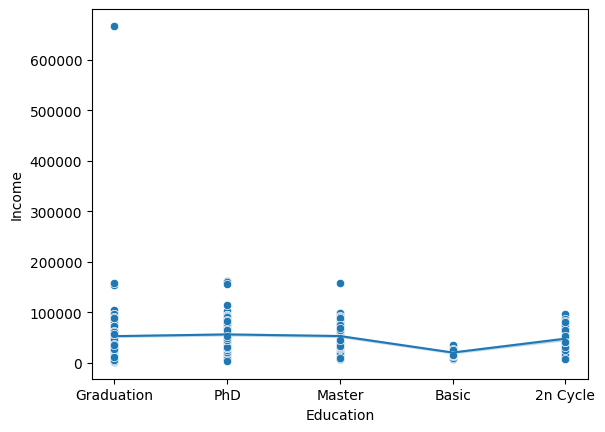

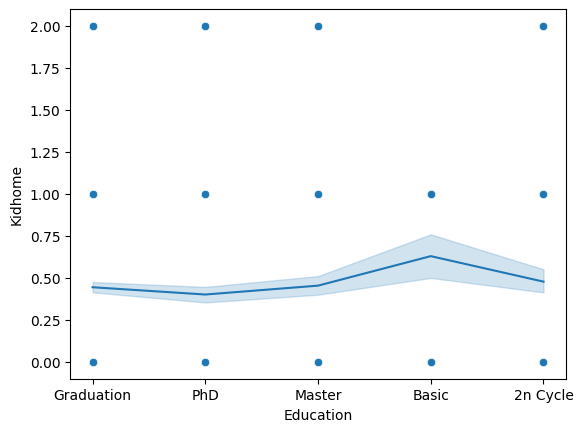

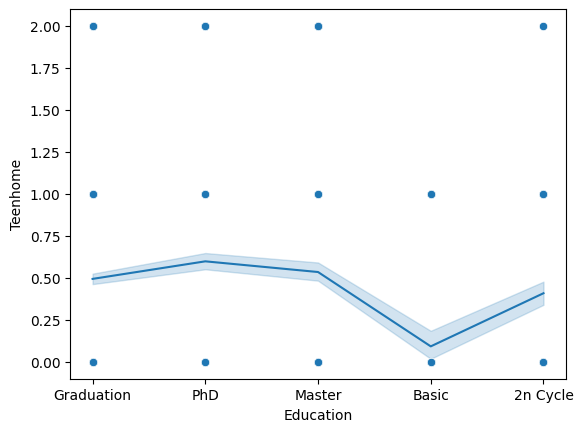

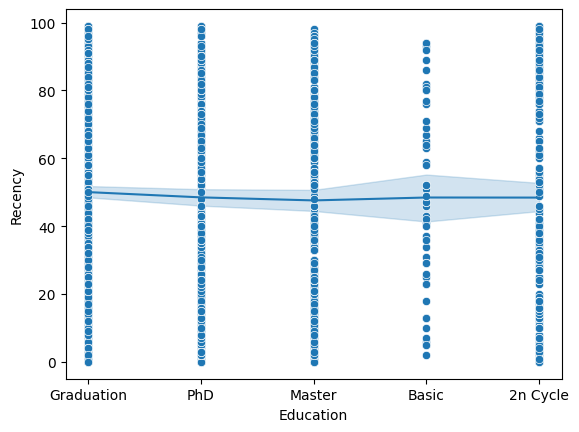

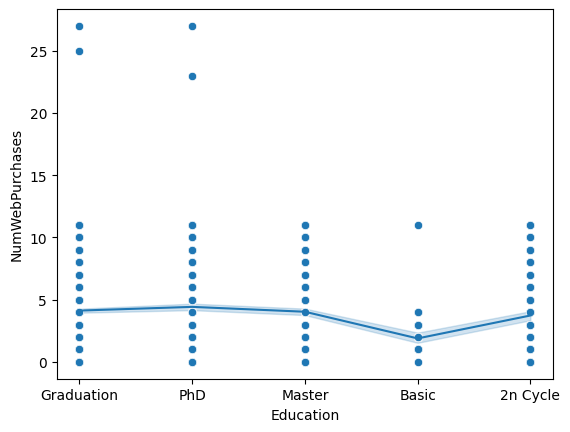

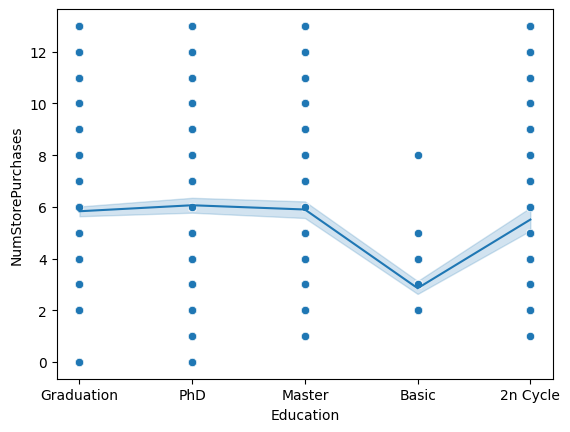

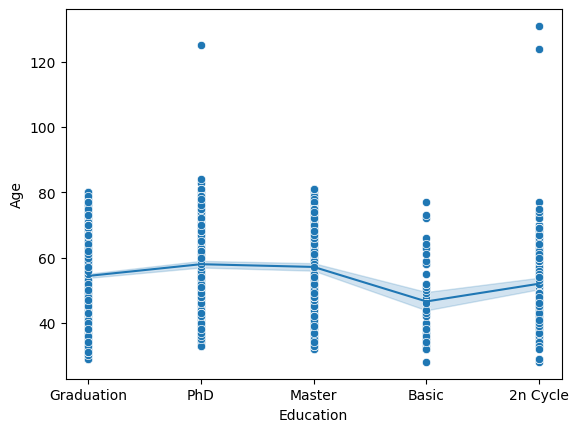

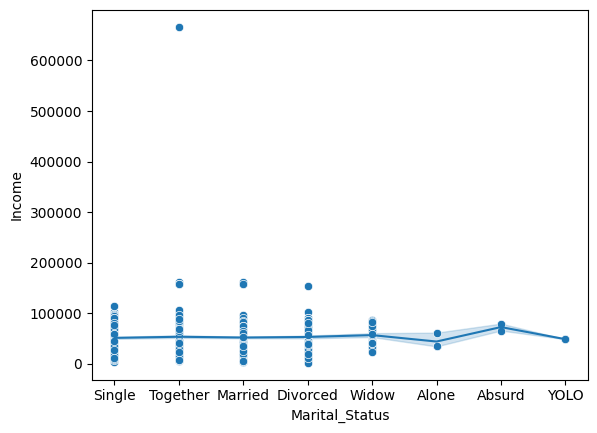

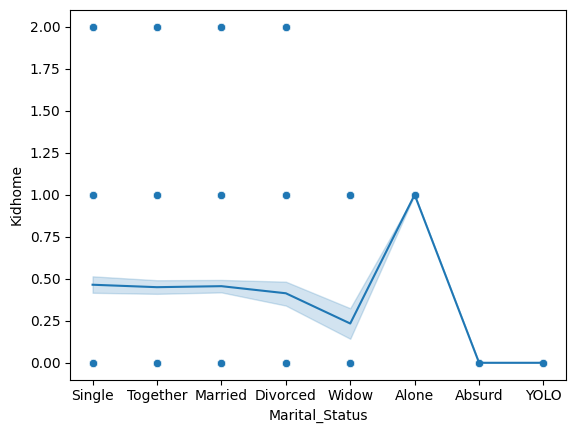

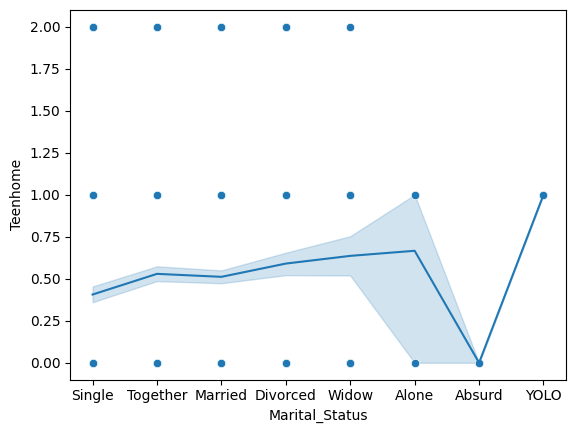

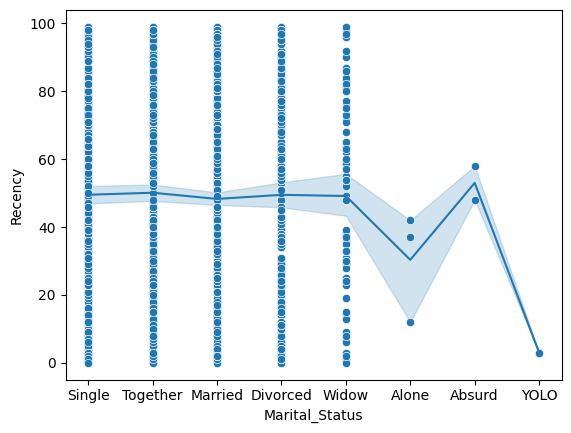

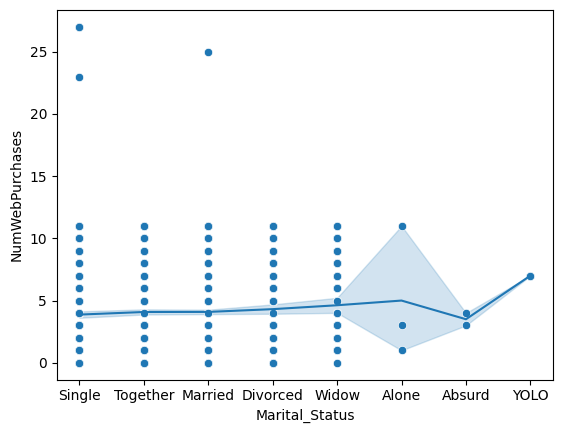

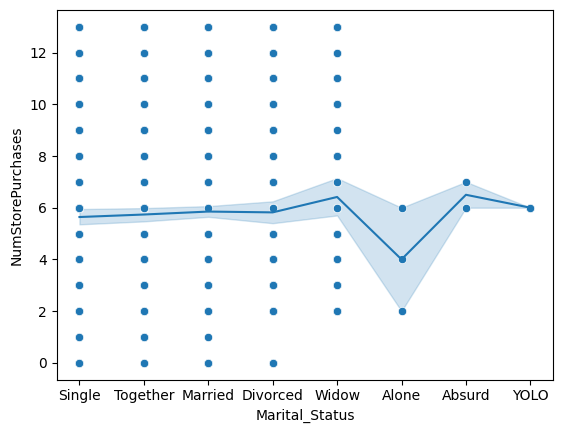

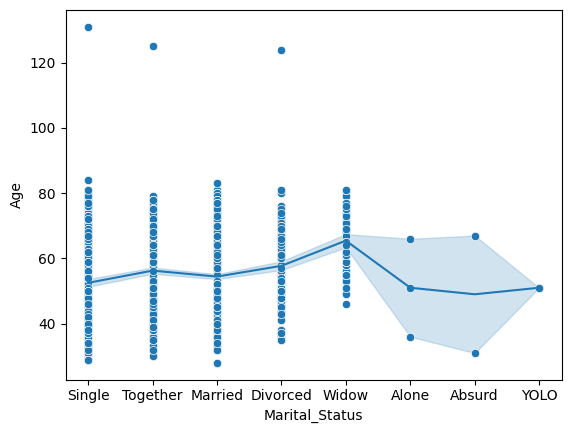

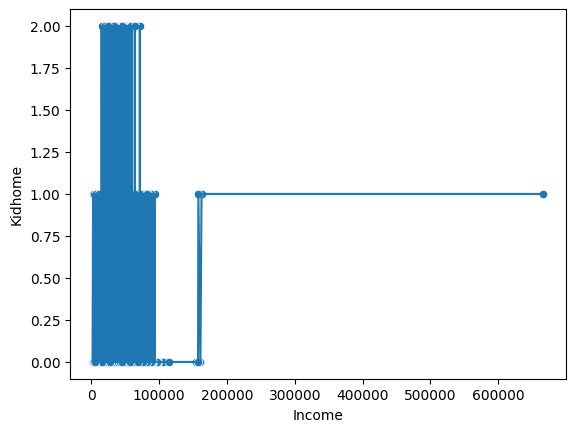

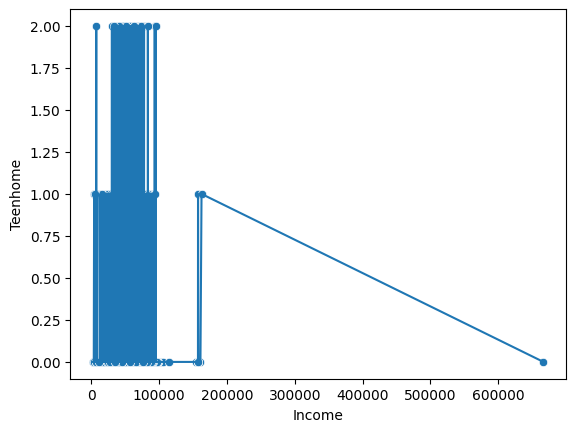

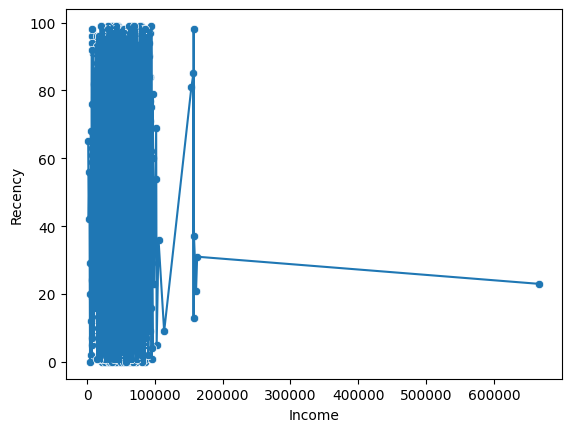

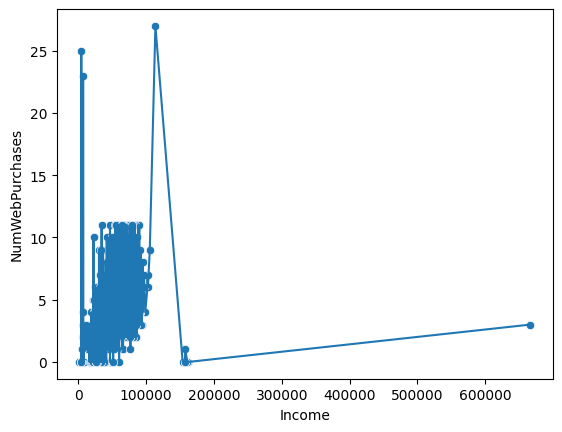

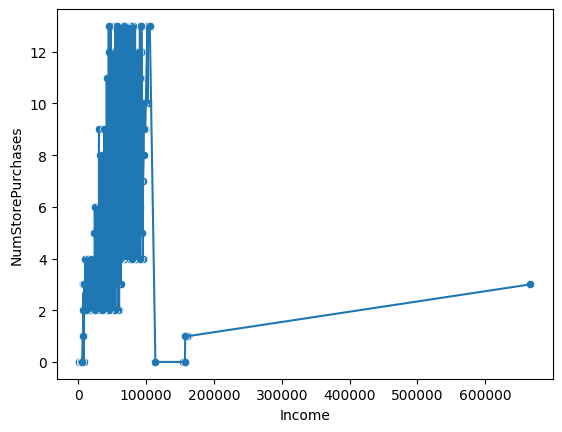

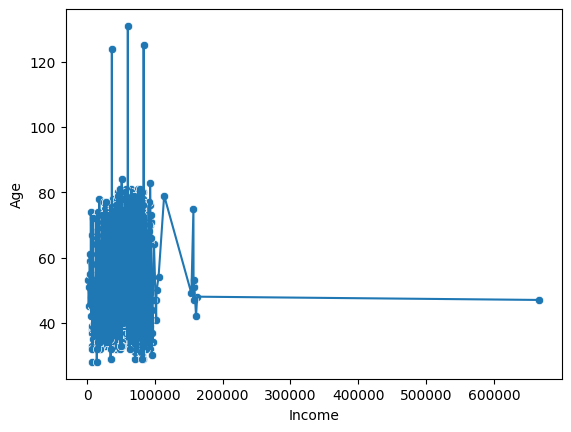

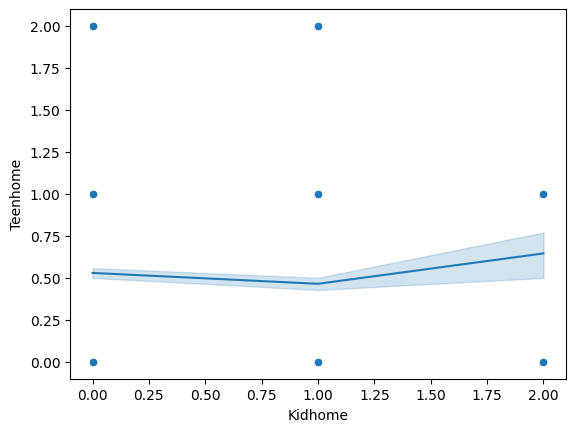

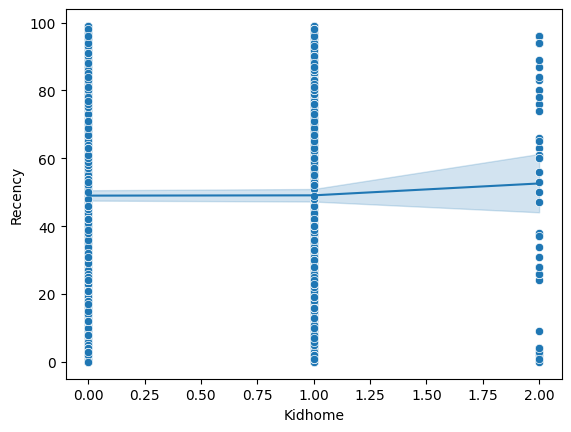

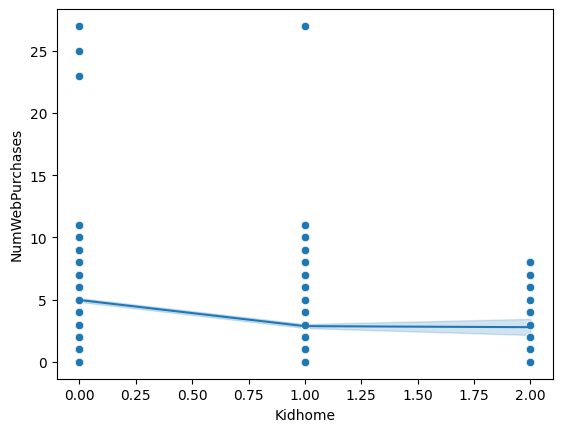

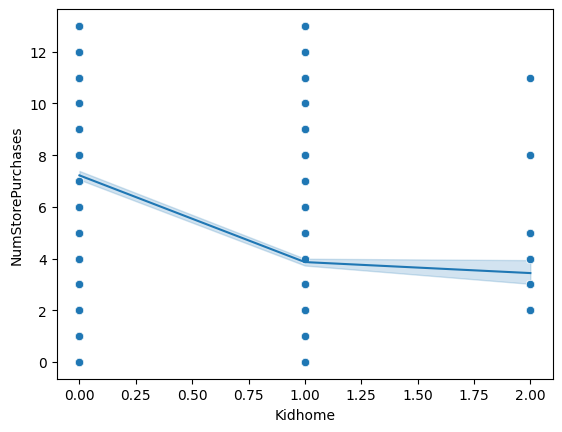

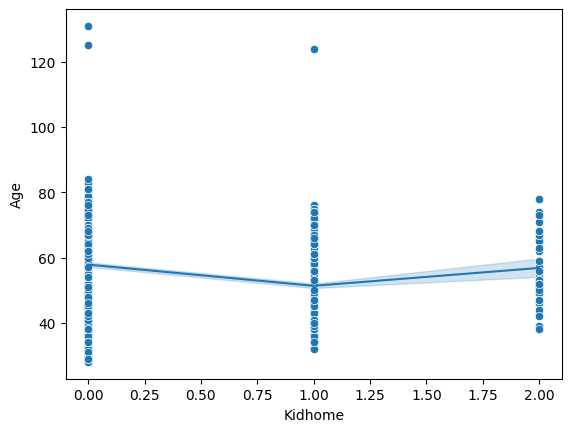

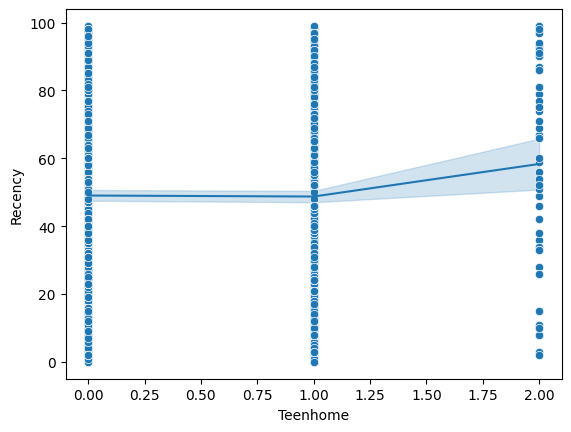

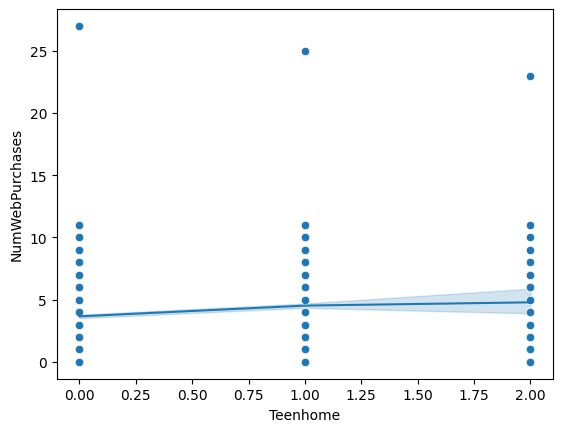

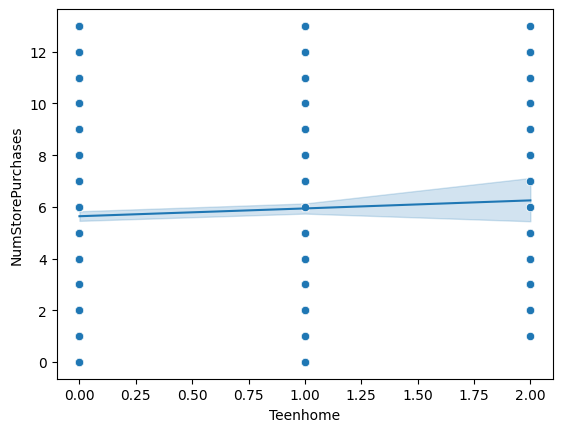

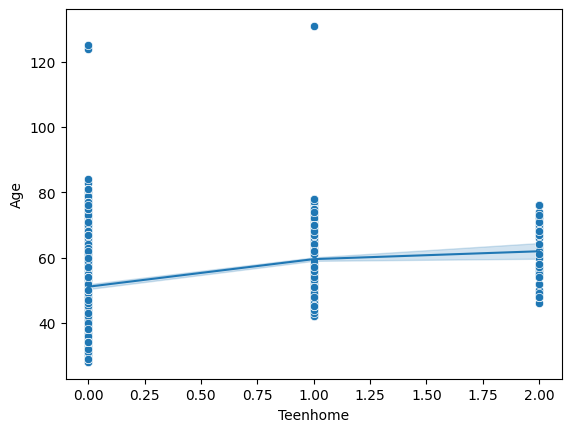

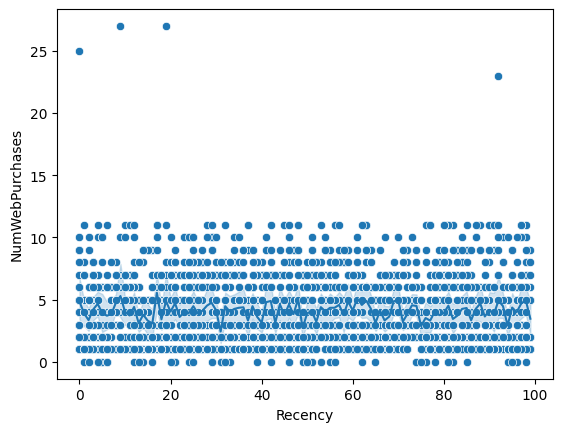

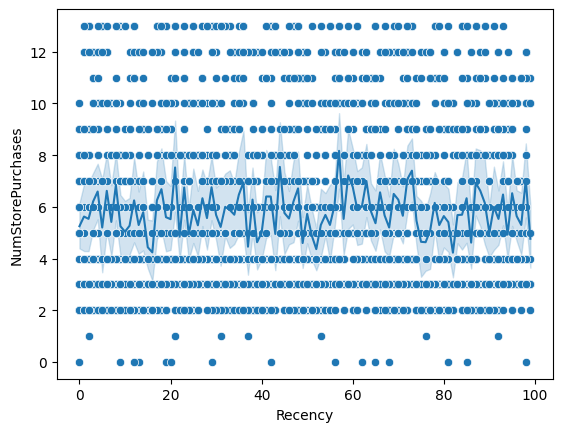

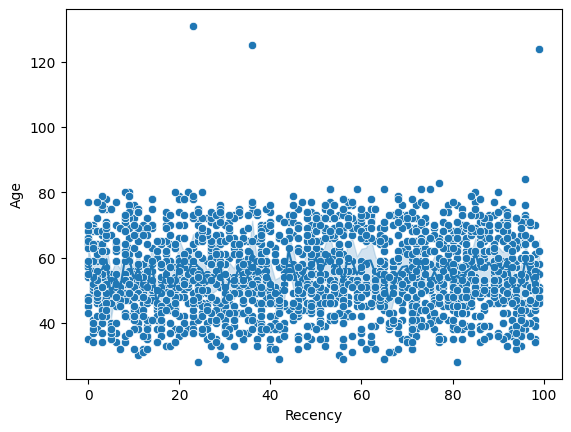

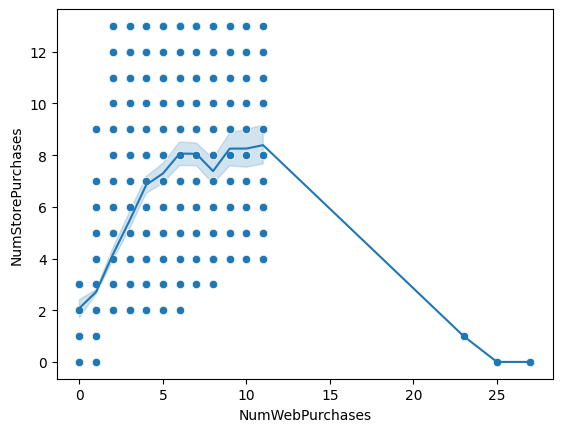

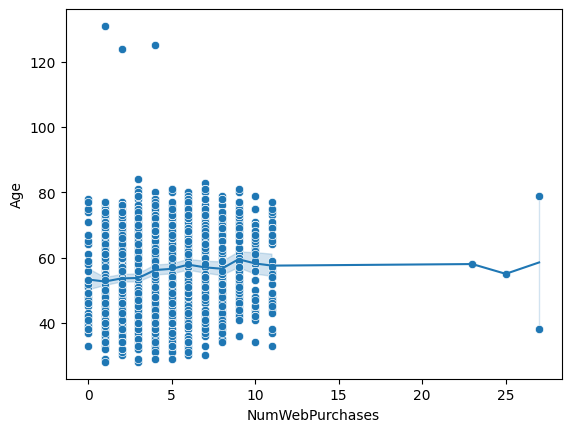

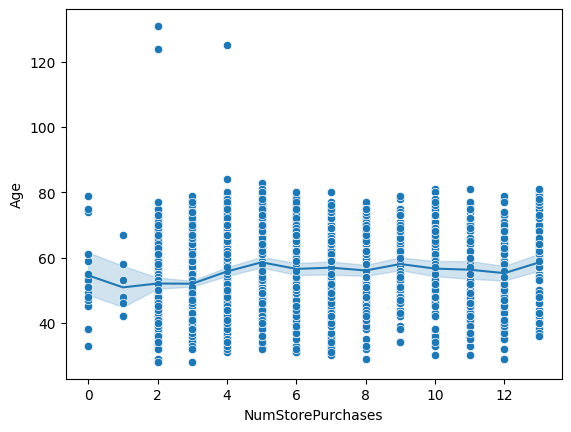

In [9]:
# Medium 
intresting_columns = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'Age']
for i in range(len(intresting_columns)):
    for j in range(i+1, len(intresting_columns)):
        sns.lineplot(data=df, x=intresting_columns[i], y=intresting_columns[j])
        sns.scatterplot(data=df, x=intresting_columns[i], y=intresting_columns[j])
        plt.show()
        

### Заметки:

1. Тк много категориальных данных, представленных в виде строк, а не численных категорий, то где-то можем глазками поменять точки, чтобы график был более похож на линейную зависимость 

2. Lineplot не дает полную информаци., поэтому еще будем учитывать scatterplot чтобы видеть как рассеяны данные 


#### Заметная корреляция(графики  линейны)

- NumWebPurchases - NumStorePurchases: чем больше покупок онлайн, тем больше покупок офлайн(и наоборот) -- скорее всего, покупатель просто становится постоянным клиентом и пользуется всеми сервисами 

- Kidhome - NumStorePurchases: чем больше детей, тем меньше покупок офлайн

- Income - Graduation: люди с Basic образованием, получают меньше денег

- Income - NumStorePurchases: с ростом дохода, растет и количество покупок (Интересно, что это не свойственно для покупок онлайн)



#### Вывод:

- сомневаюсь в точности выводов выше, вероятно, некоторые из них связаны с тем, что каких-то данных просто меньше, чем остальных(например, людей с basic образованием меньше, чем людей с PhD)
